In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

In [20]:
def rent(filename): # 전월세
    file=filename
    data=pd.read_excel(file, header=16)
    
    data['계약년월'] = pd.to_datetime(data['계약년월'], format='%Y%m')
    monthly = data[data['전월세구분']=='월세']
    
# 월세 : month_df 에 컬럼 추가 후 시군구 컬럼에서 동구만 추출
    month_df = monthly[['시군구', '전용면적(㎡)', '계약년월','전월세구분','월세(만원)', '건축년도' ]]
    month_df['시군구']=month_df['시군구'].apply(lambda v : v.split()[1])
    month_df = month_df[month_df['시군구']!='군위군']
    month_df = month_df.drop(columns='전월세구분', axis=1)

# 전세 : annually_df 에 컬럼 추가 후 시군구 컬럼에서 동구만 추출    
    annually = data[data['전월세구분']=='전세']
    annually_df = annually[['시군구','전용면적(㎡)', '계약년월','전월세구분','보증금(만원)', '건축년도' ]]
    annually_df['시군구']=annually['시군구'].apply(lambda v : v.split()[1])
    annually_df['보증금(만원)'] = annually_df['보증금(만원)'].apply(lambda x:int(x.replace(',', '')))
    annually_df = annually_df[annually_df['시군구']!='군위군']
    annually_df = annually_df.drop(columns='전월세구분', axis=1)

    
    return month_df, annually_df

def trading(filename): # 매매
    file=filename
    data=pd.read_excel(file, header=16)
    
    data['계약년월'] = pd.to_datetime(data['계약년월'], format='%Y%m')
    
# 매매 : 
    trading_df = data[['시군구','전용면적(㎡)', '계약년월','거래금액(만원)', '건축년도' ]]
    trading_df['시군구']=data['시군구'].apply(lambda v : v.split()[1])
    trading_df['거래금액(만원)'] = trading_df['거래금액(만원)'].apply(lambda x:int(x.replace(',', '')))
    trading_df = trading_df[trading_df['시군구']!='군위군']

    return trading_df


c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\KDP-48\AppData\Local\Temp\ipykernel_12916\2902389076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['시군구']=month_df['시군구'].apply(lambda v : v.split()[1])
C:\Users\KDP-48\AppData\Local\Temp\ipykernel_12916\2902389076.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

     시군구  전용면적(㎡)       계약년월  월세(만원)    건축년도  1평당가격(만원/㎡)
0     남구    29.68 2022-07-01      66  2020.0  2223.719677
1     남구    29.50 2022-07-01      59  2020.0  2000.000000
2     남구    42.38 2022-05-01      60  2021.0  1415.762152
3     남구    20.20 2022-05-01      36  2021.0  1782.178218
4     남구    42.38 2022-05-01      61  2021.0  1439.358188
...   ..      ...        ...     ...     ...          ...
1003  중구    29.16 2022-06-01      50  2017.0  1714.677641
1004  중구    21.58 2022-07-01      45  2017.0  2085.264133
1005  중구    21.96 2022-07-01      47  2017.0  2140.255009
1007  중구    21.96 2022-07-01      42  2017.0  1912.568306
1009  중구    21.58 2022-07-01      45  2017.0  2085.264133

[687 rows x 6 columns]


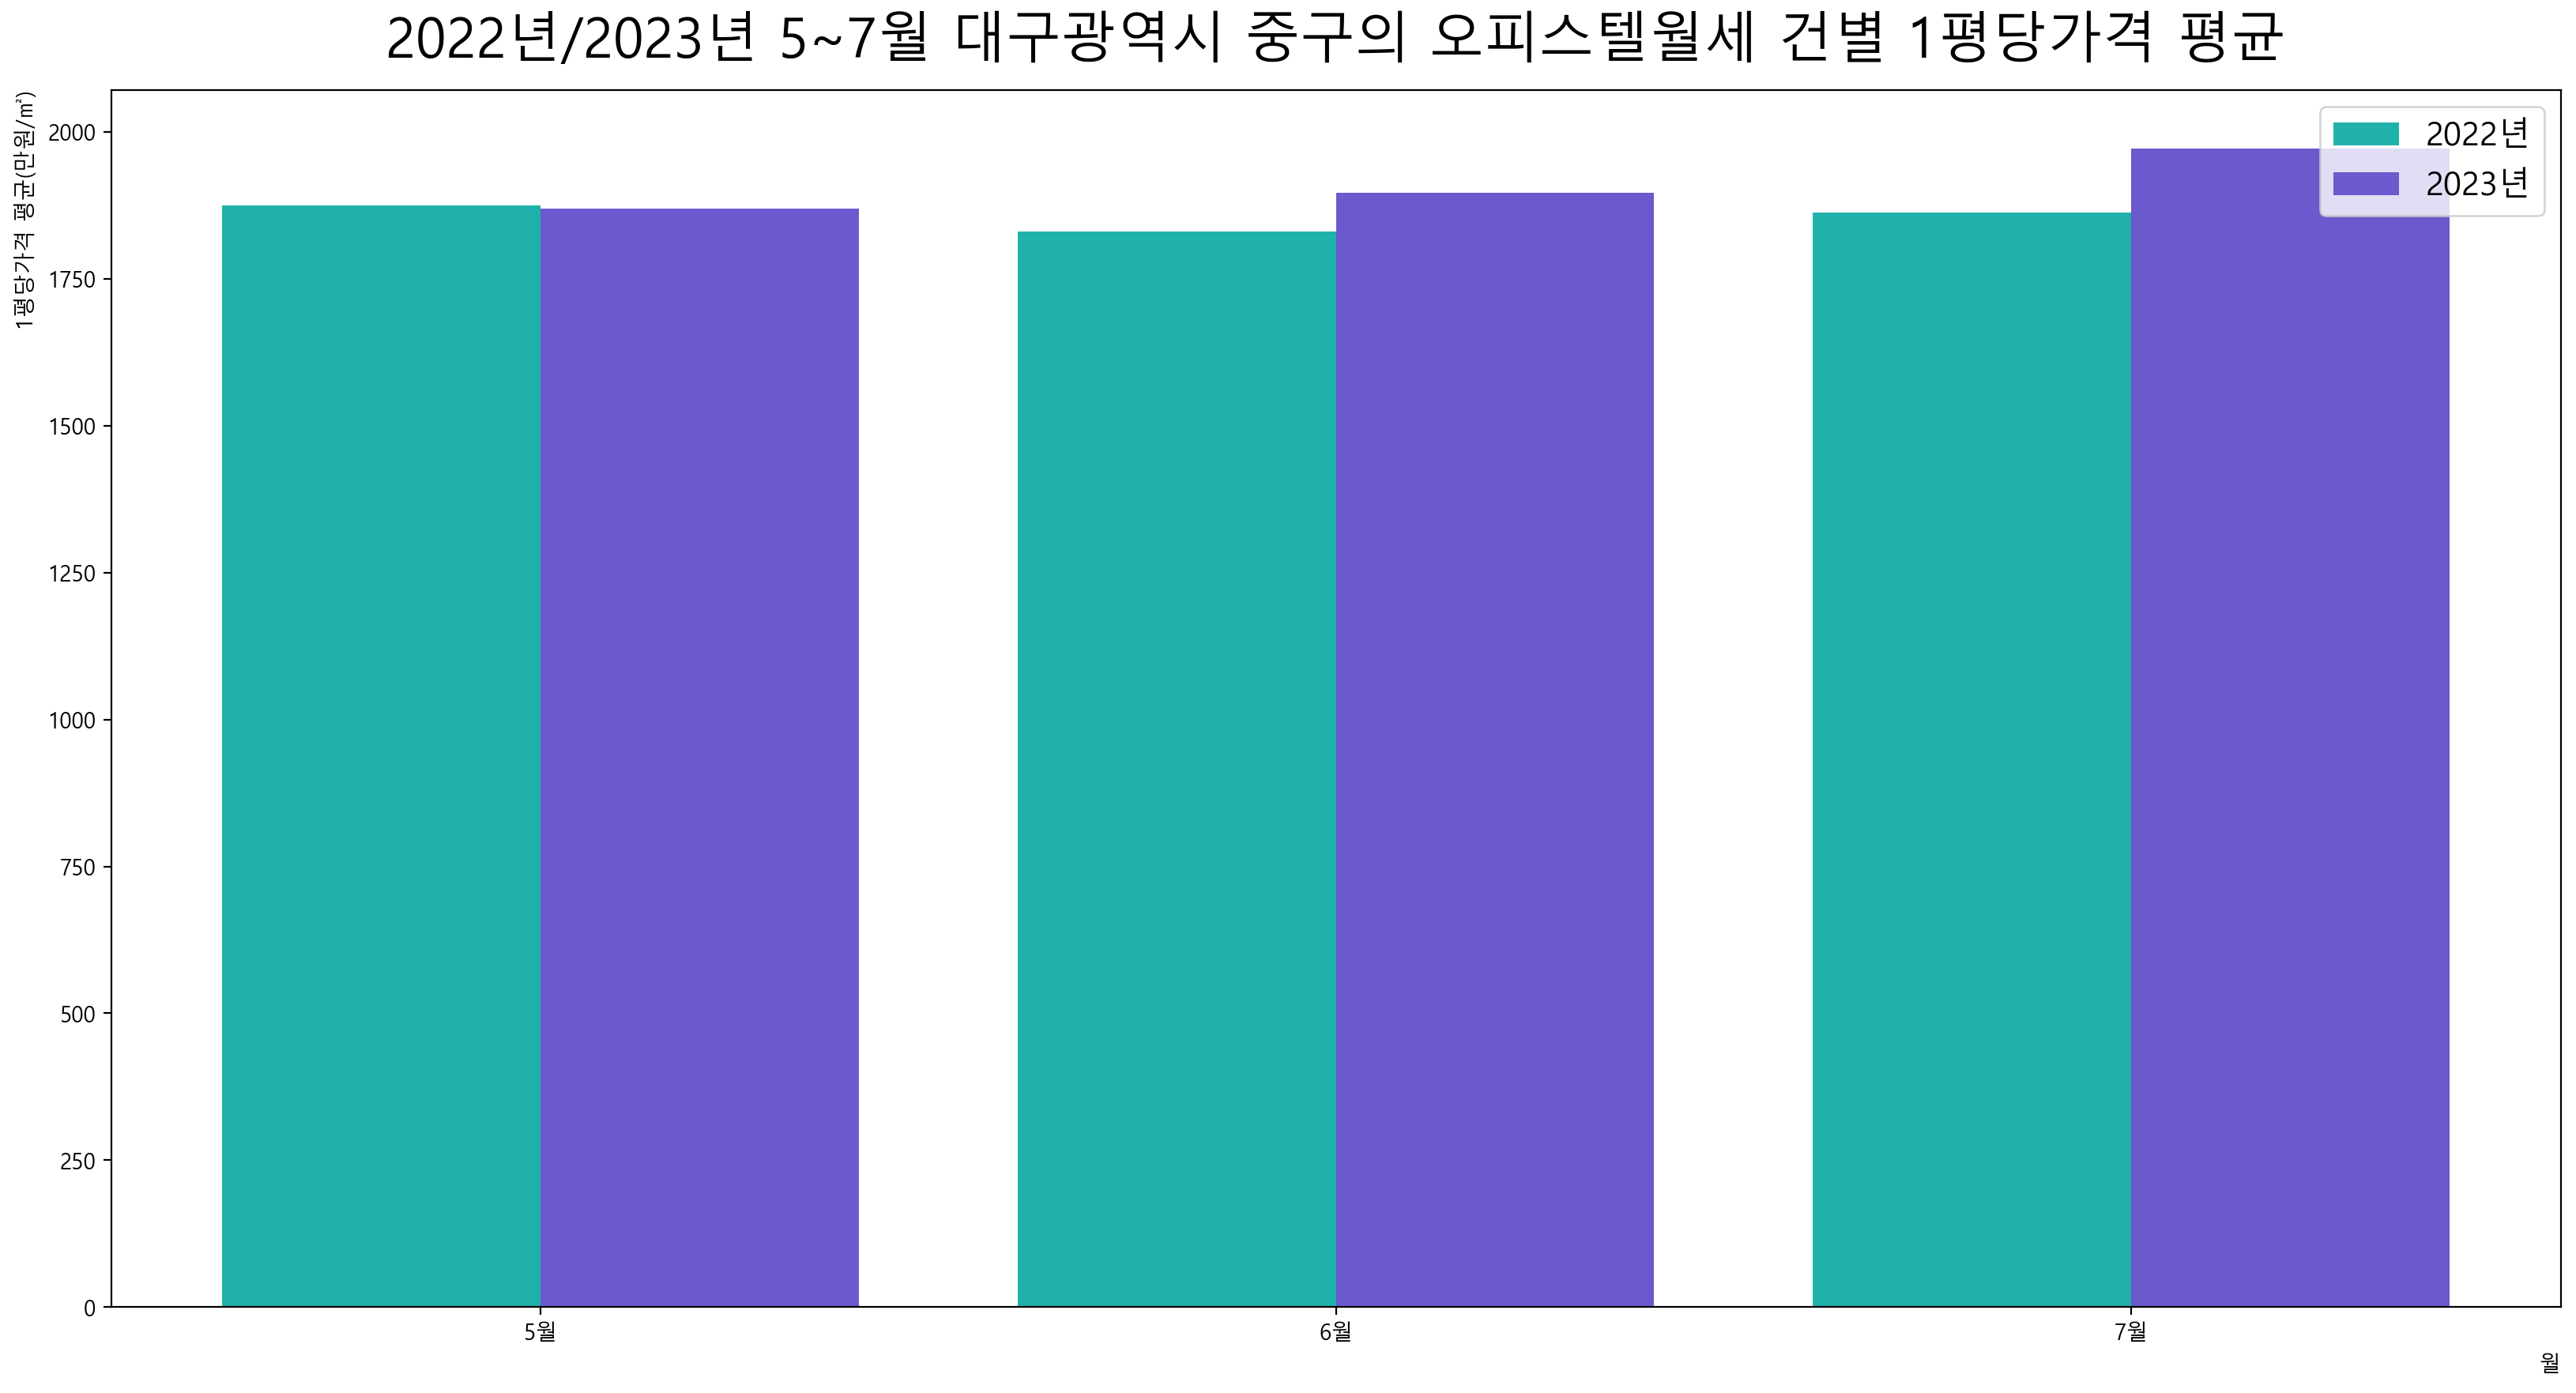

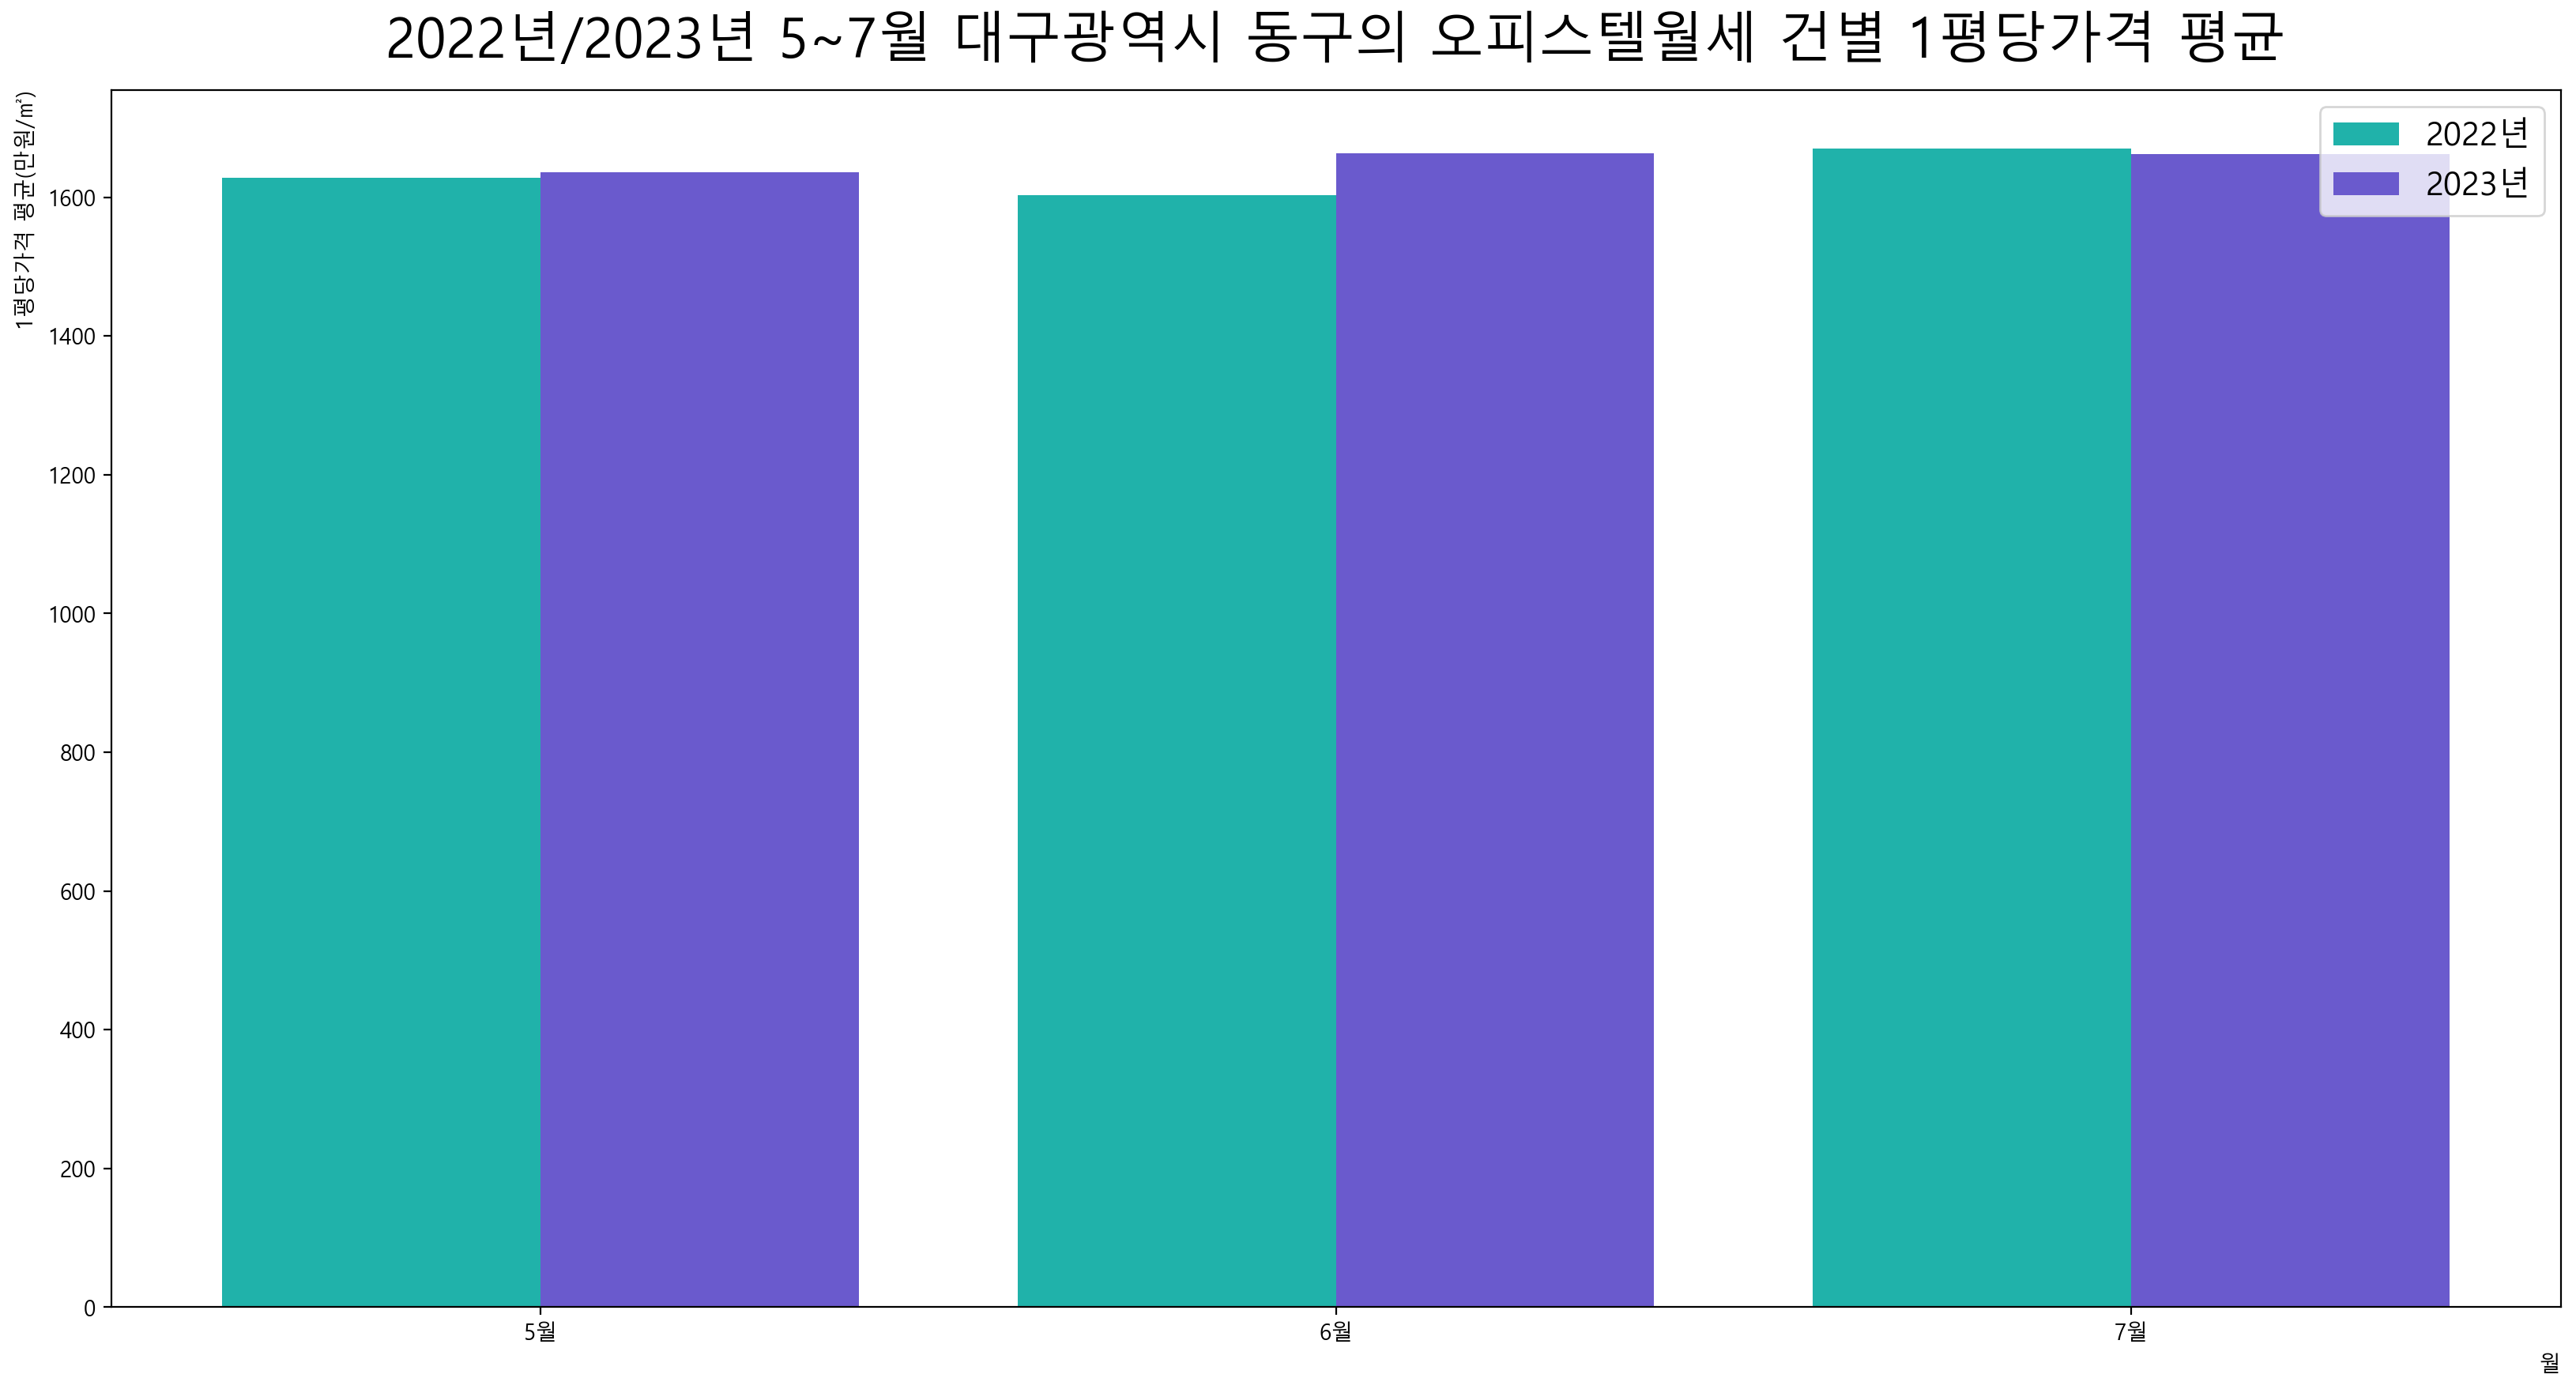

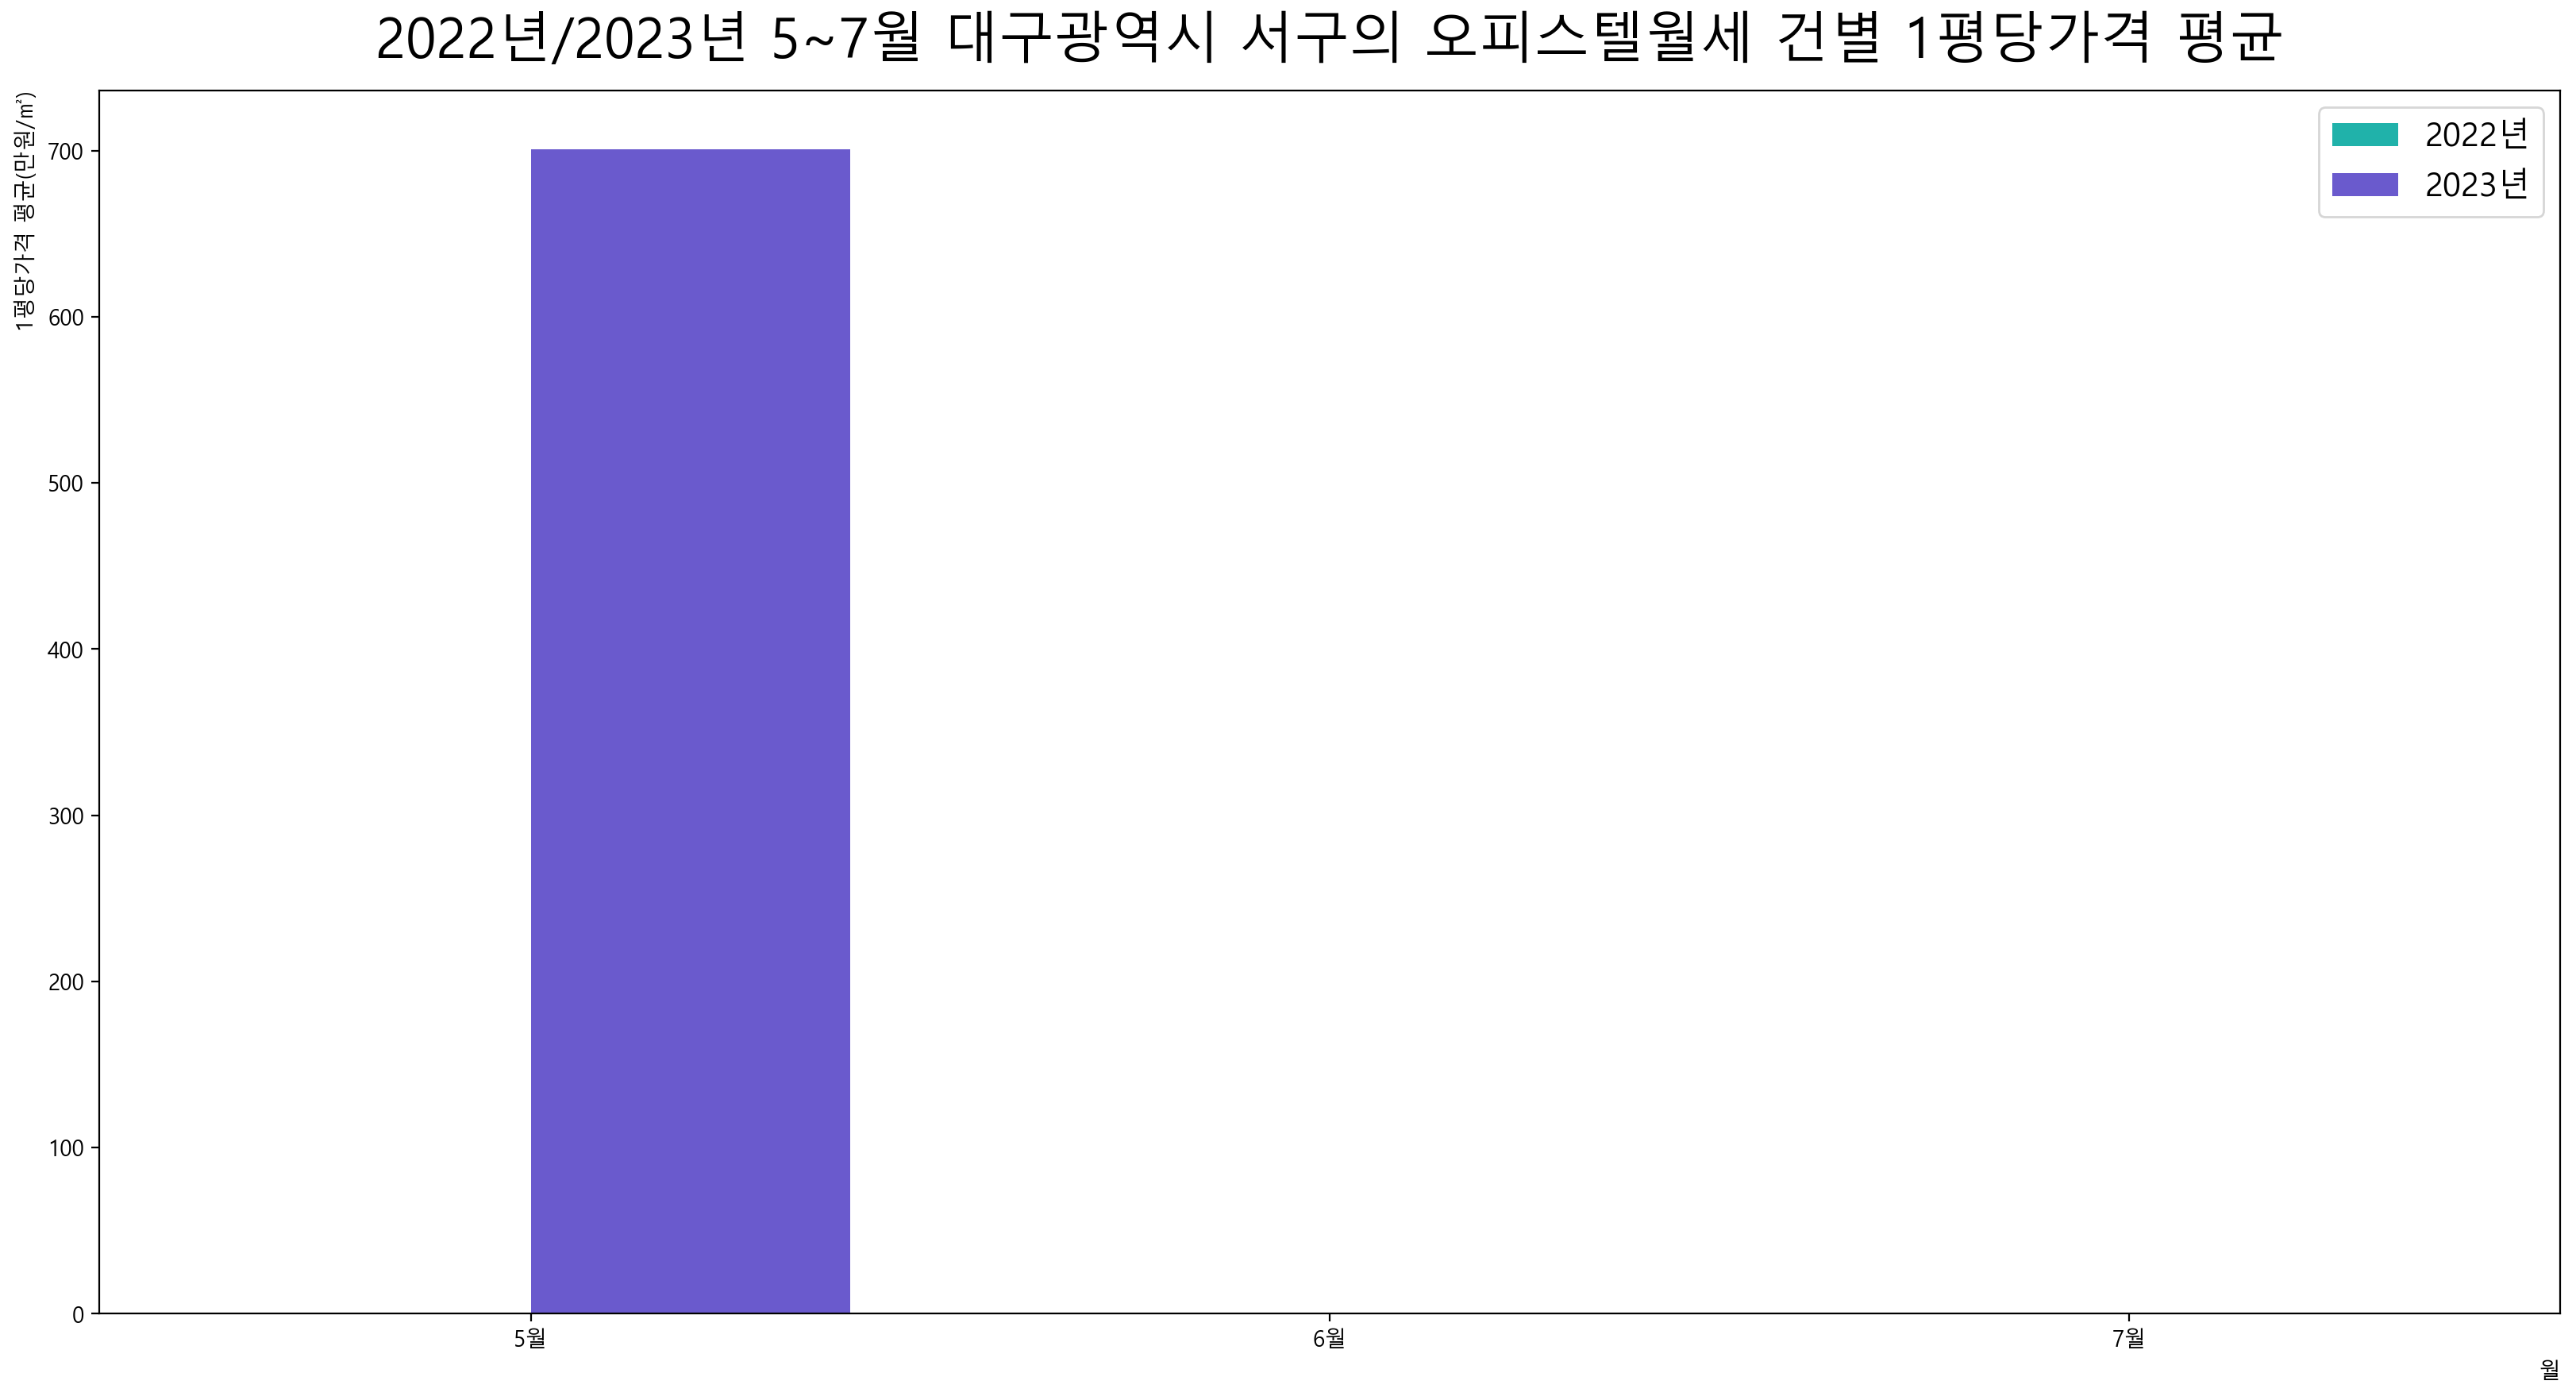

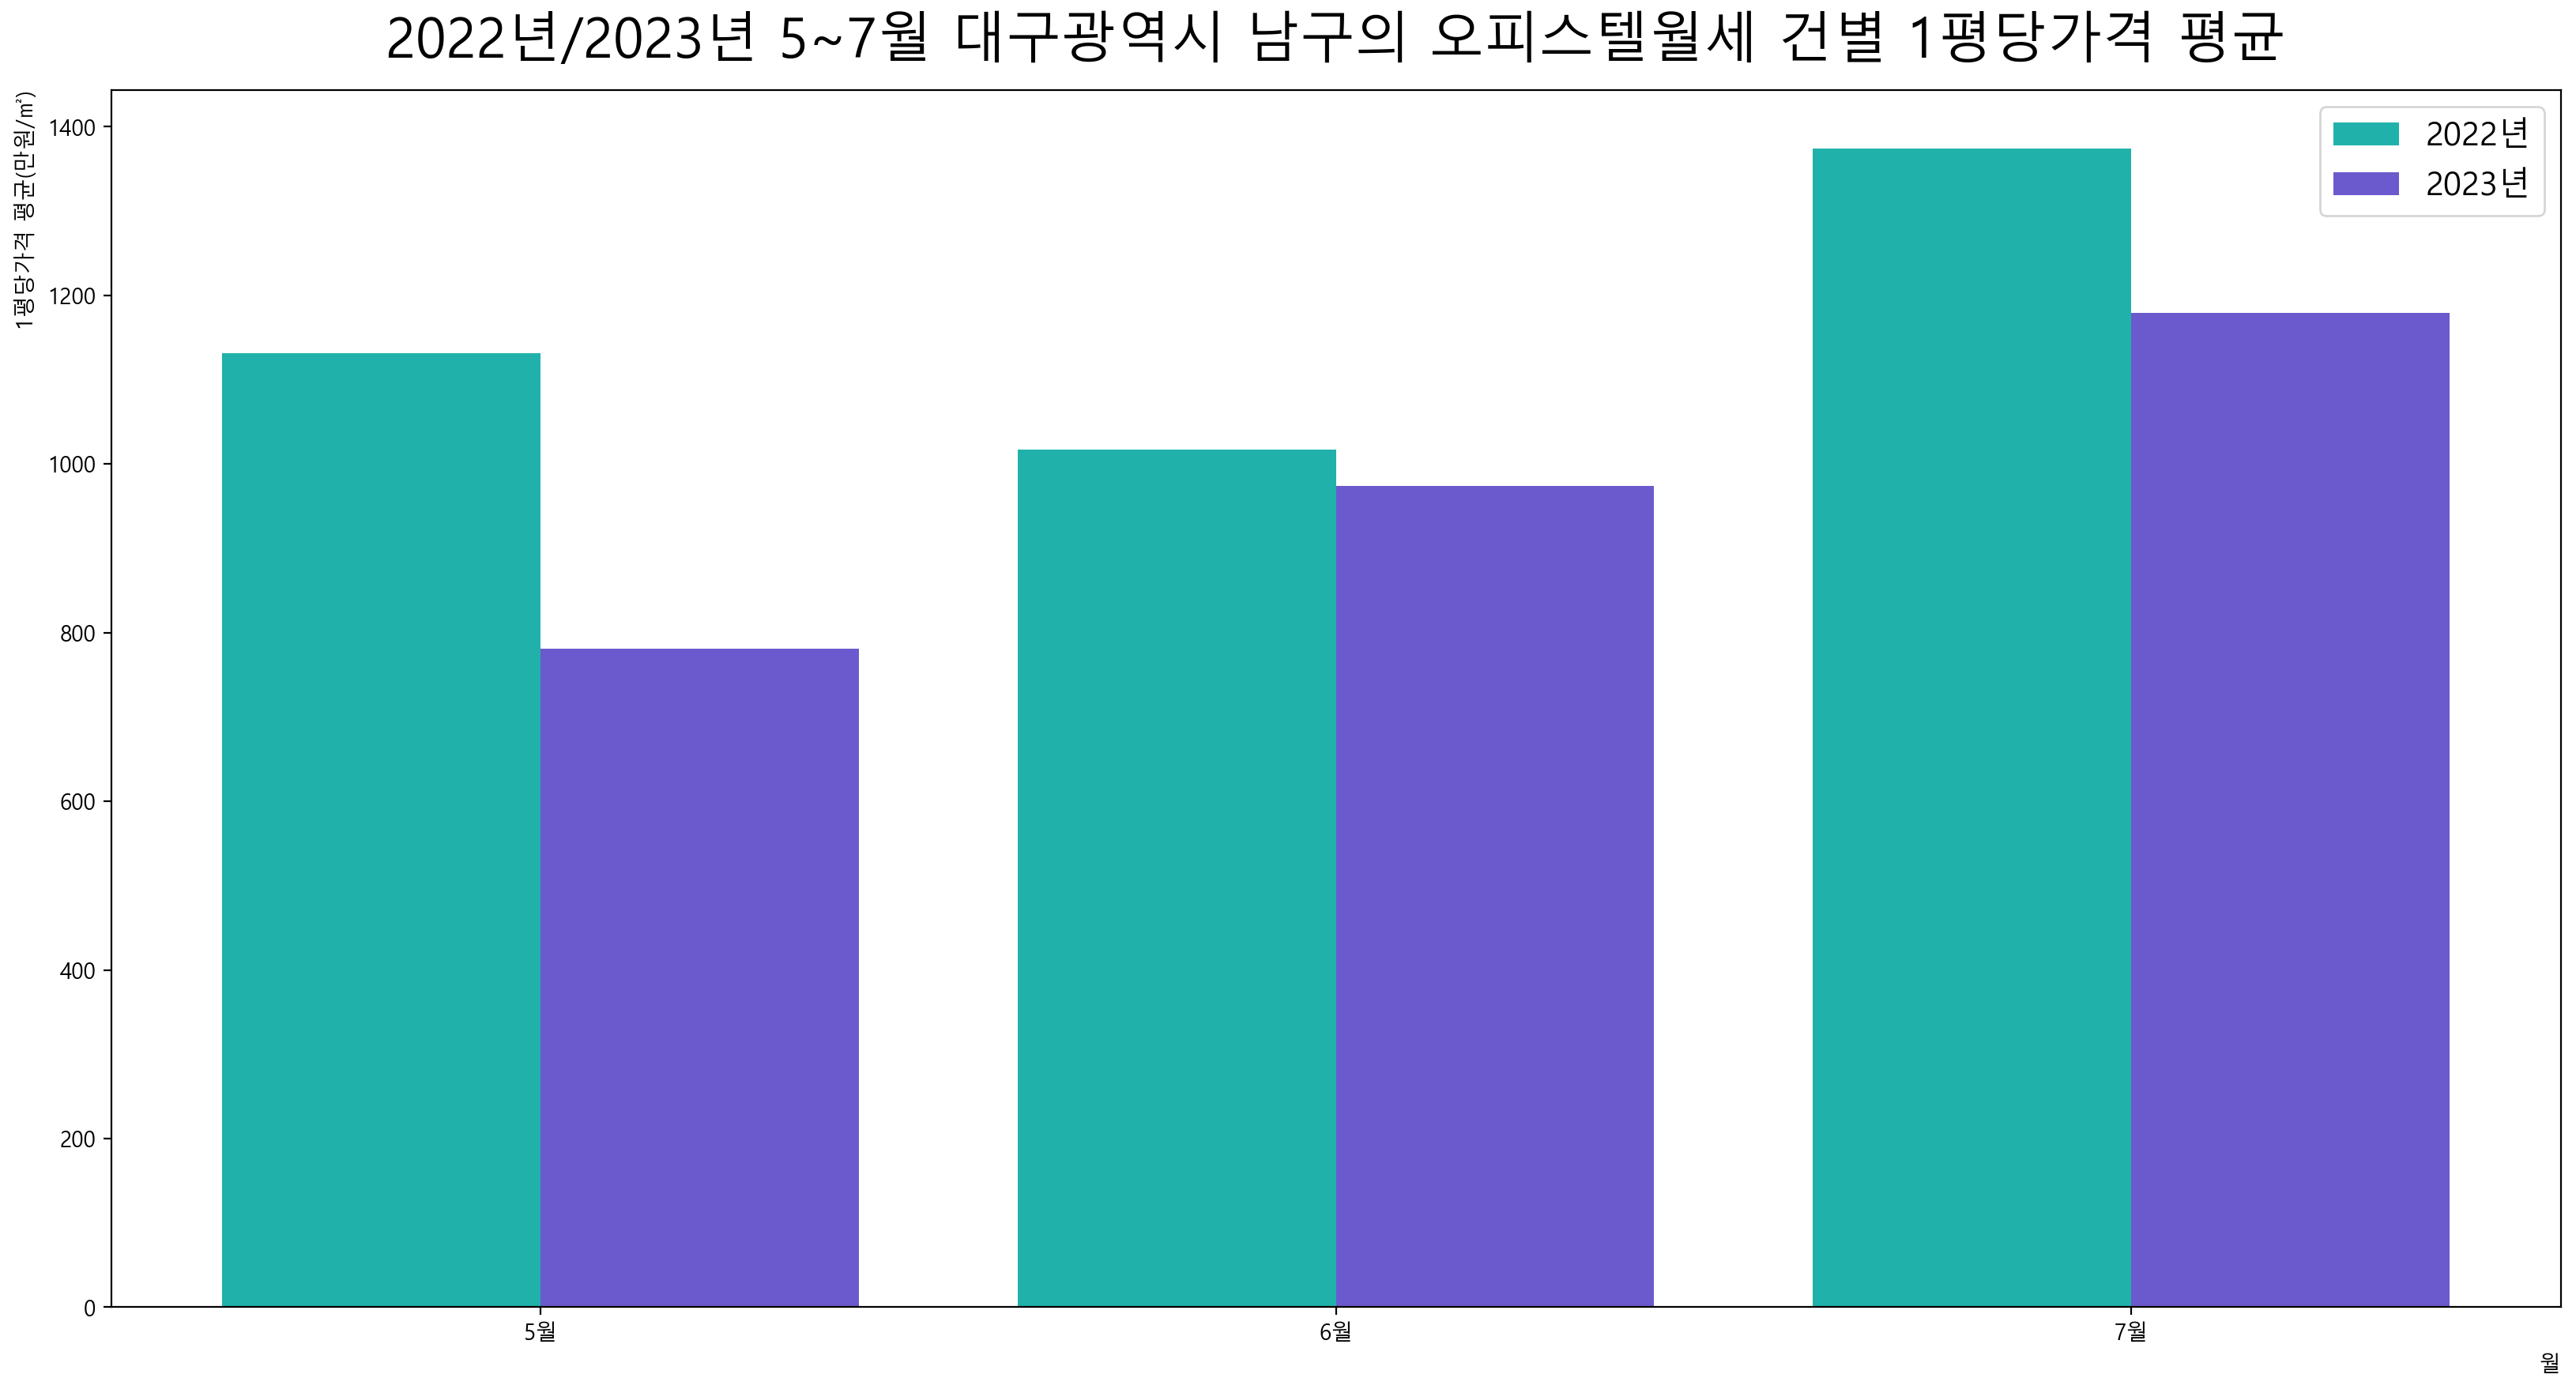

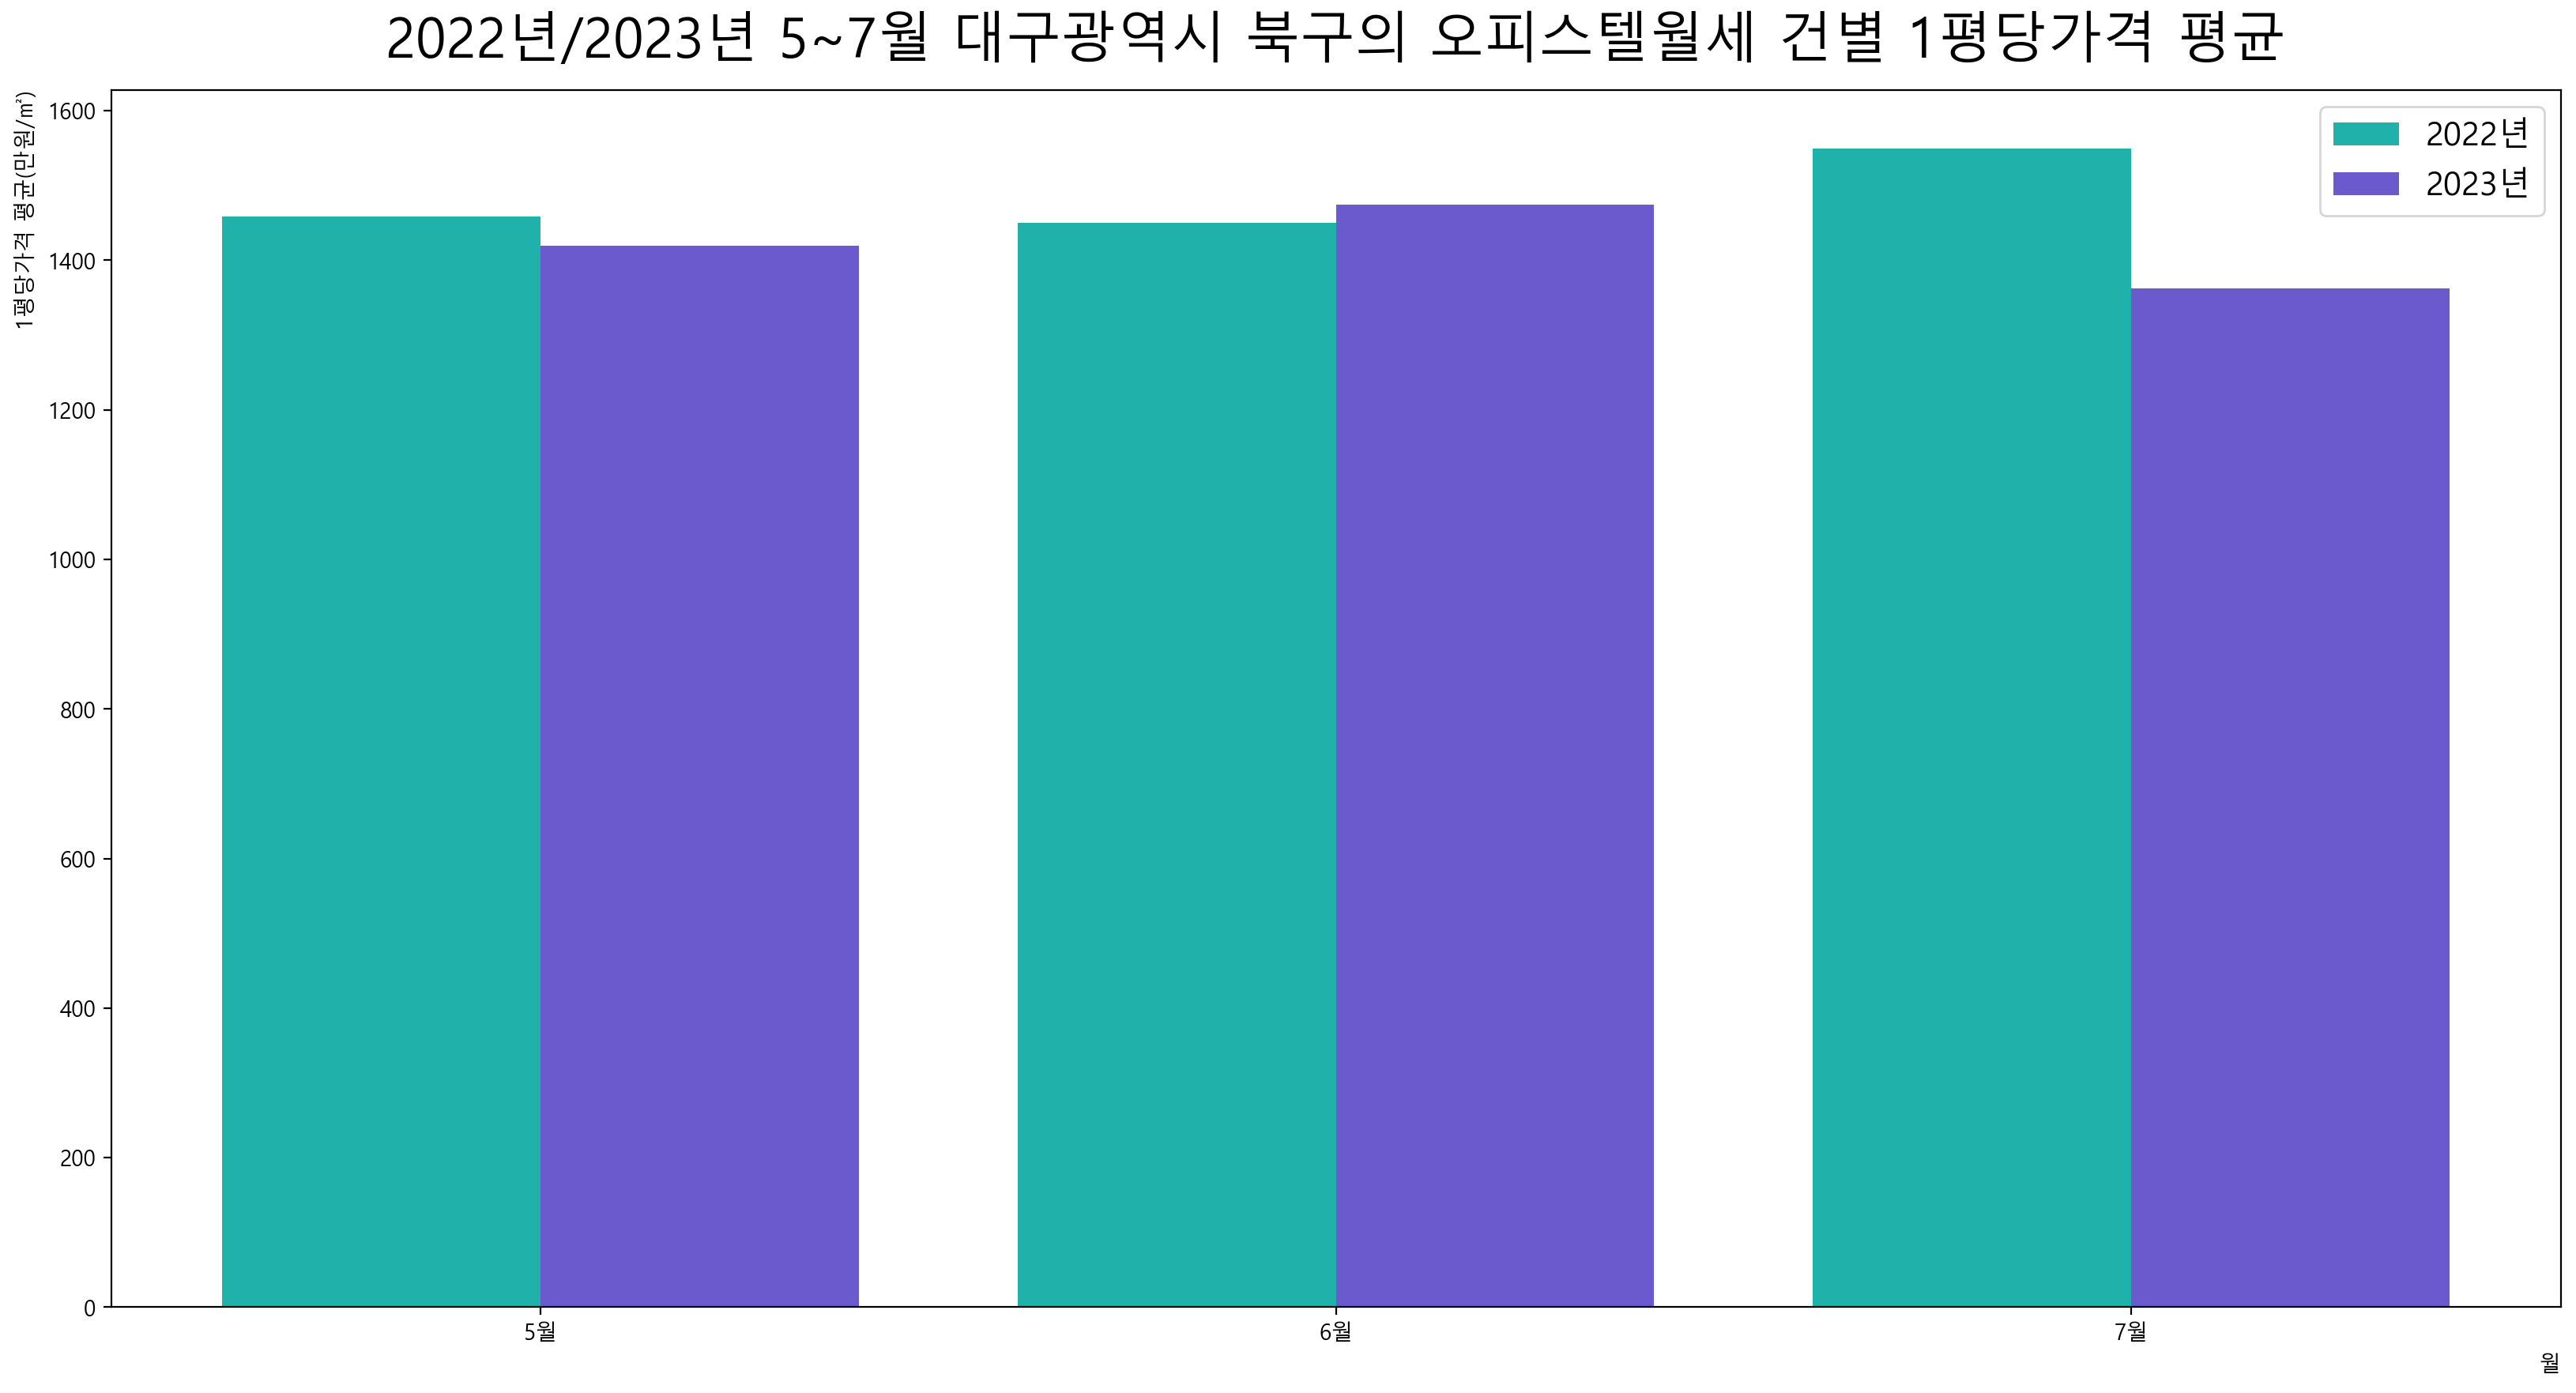

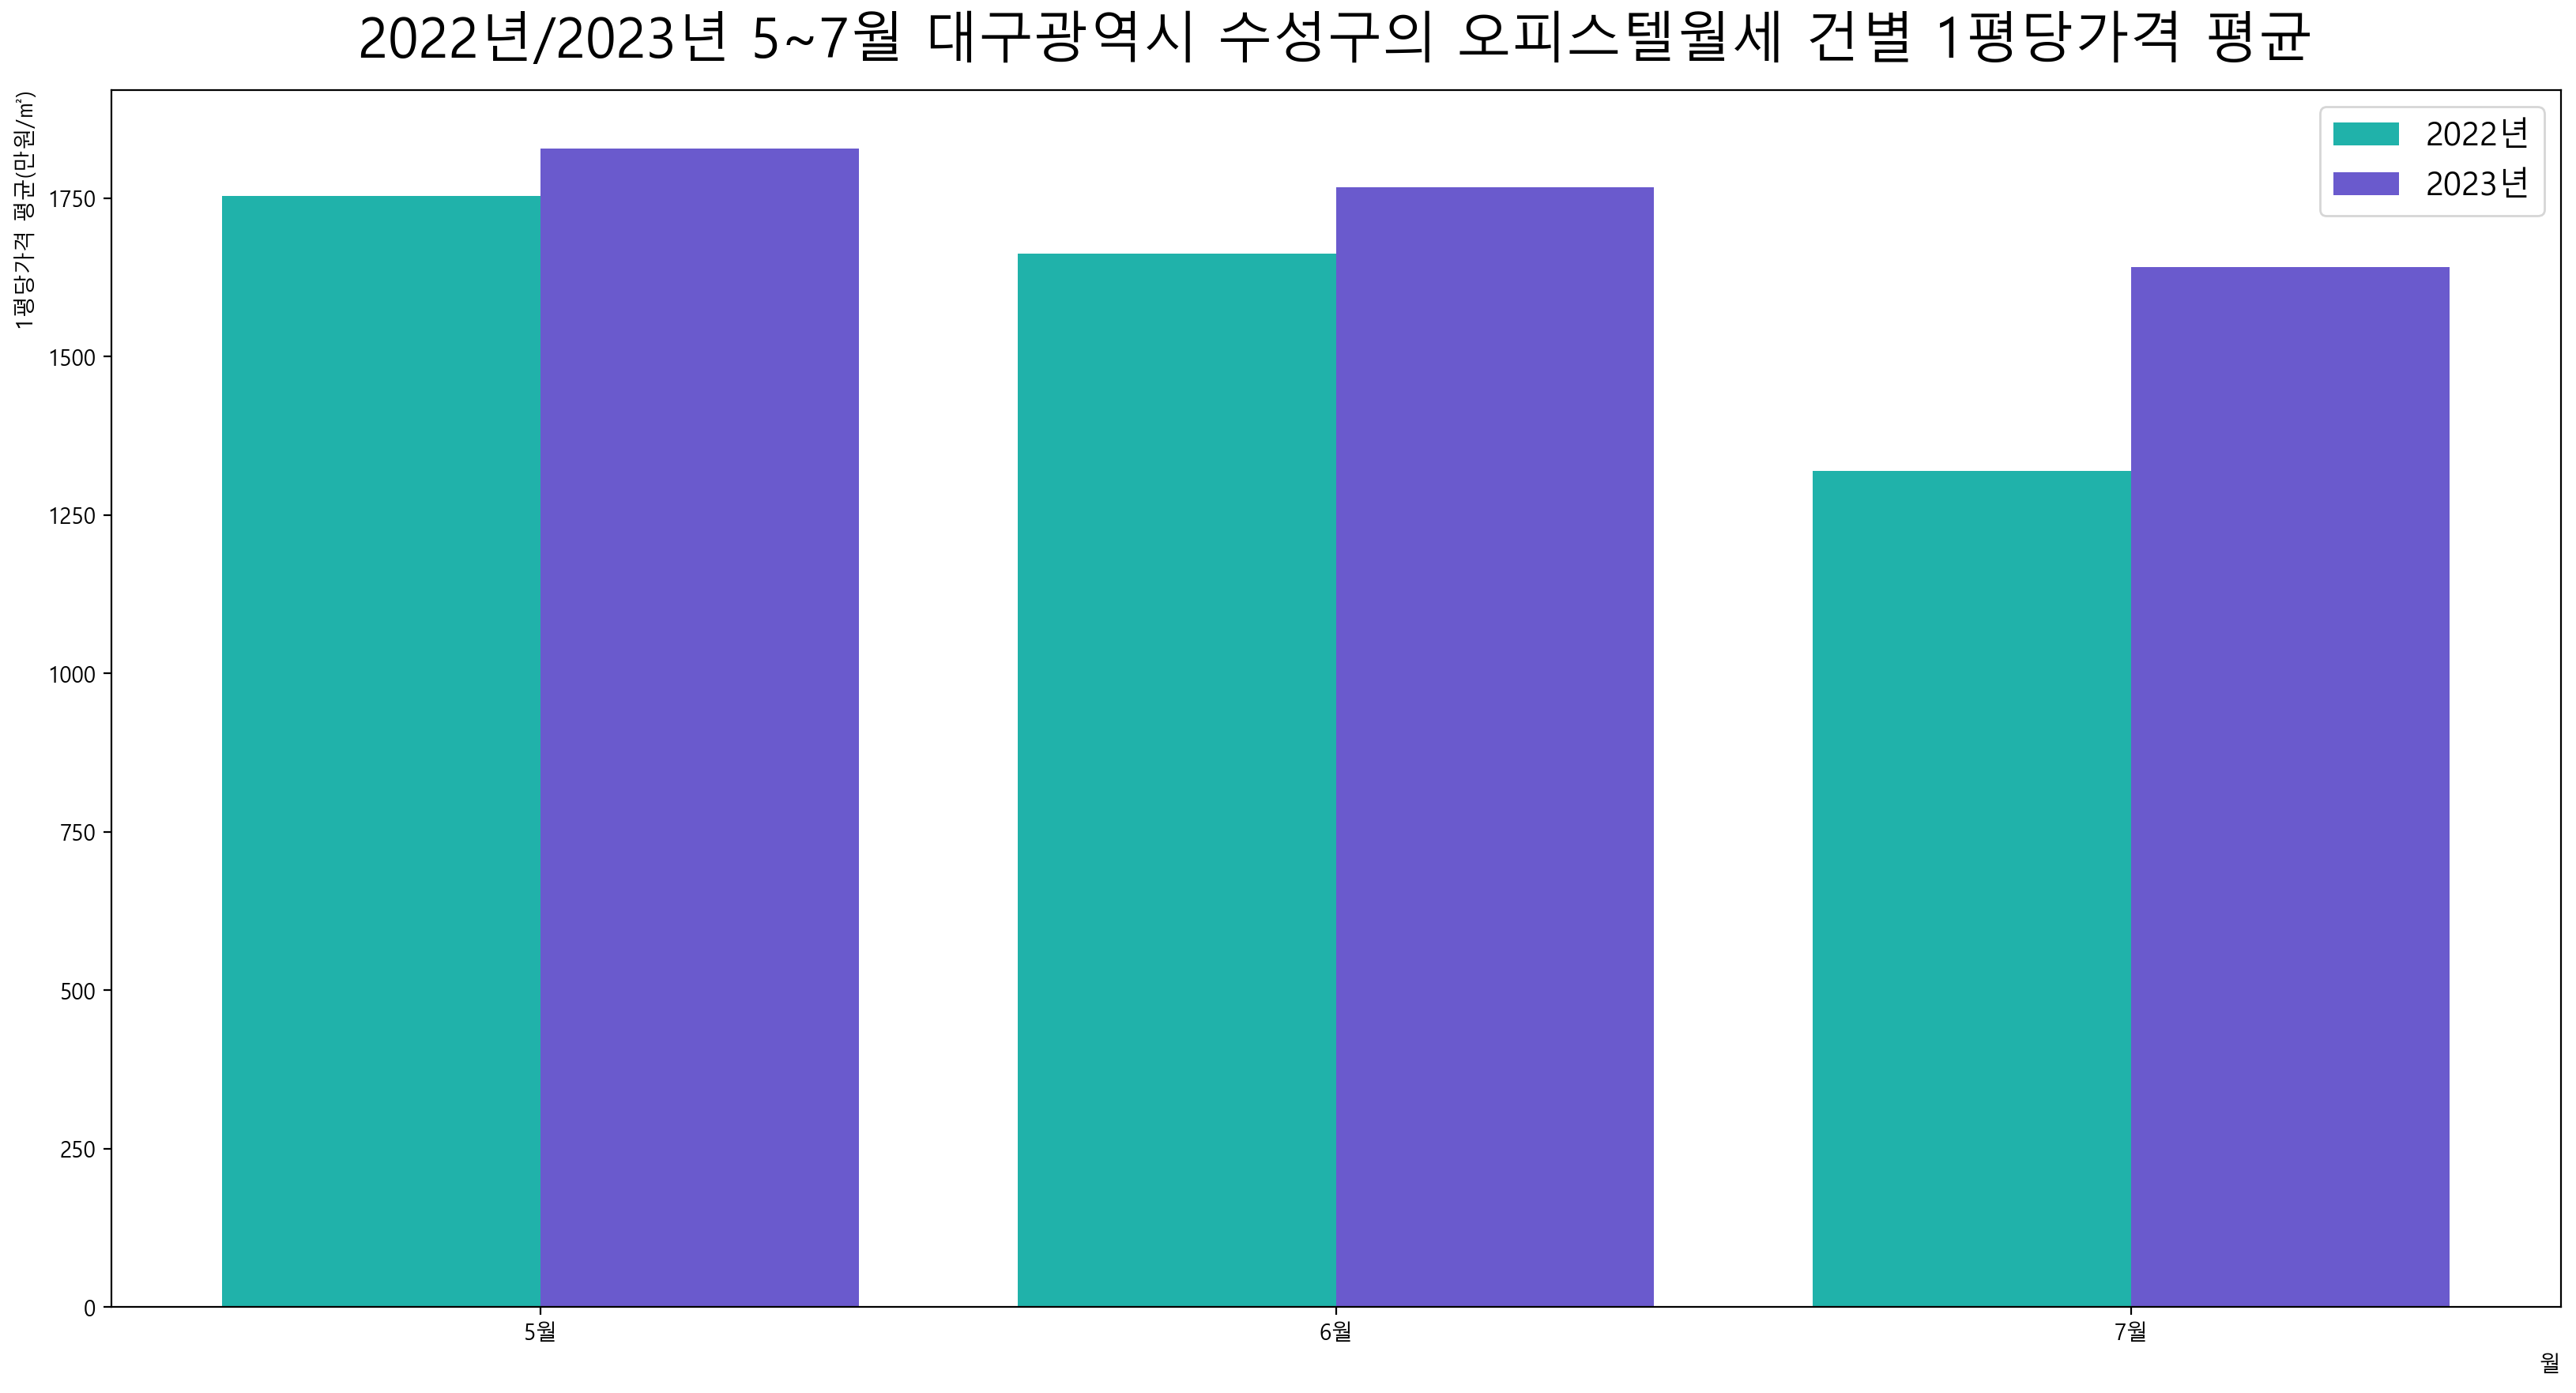

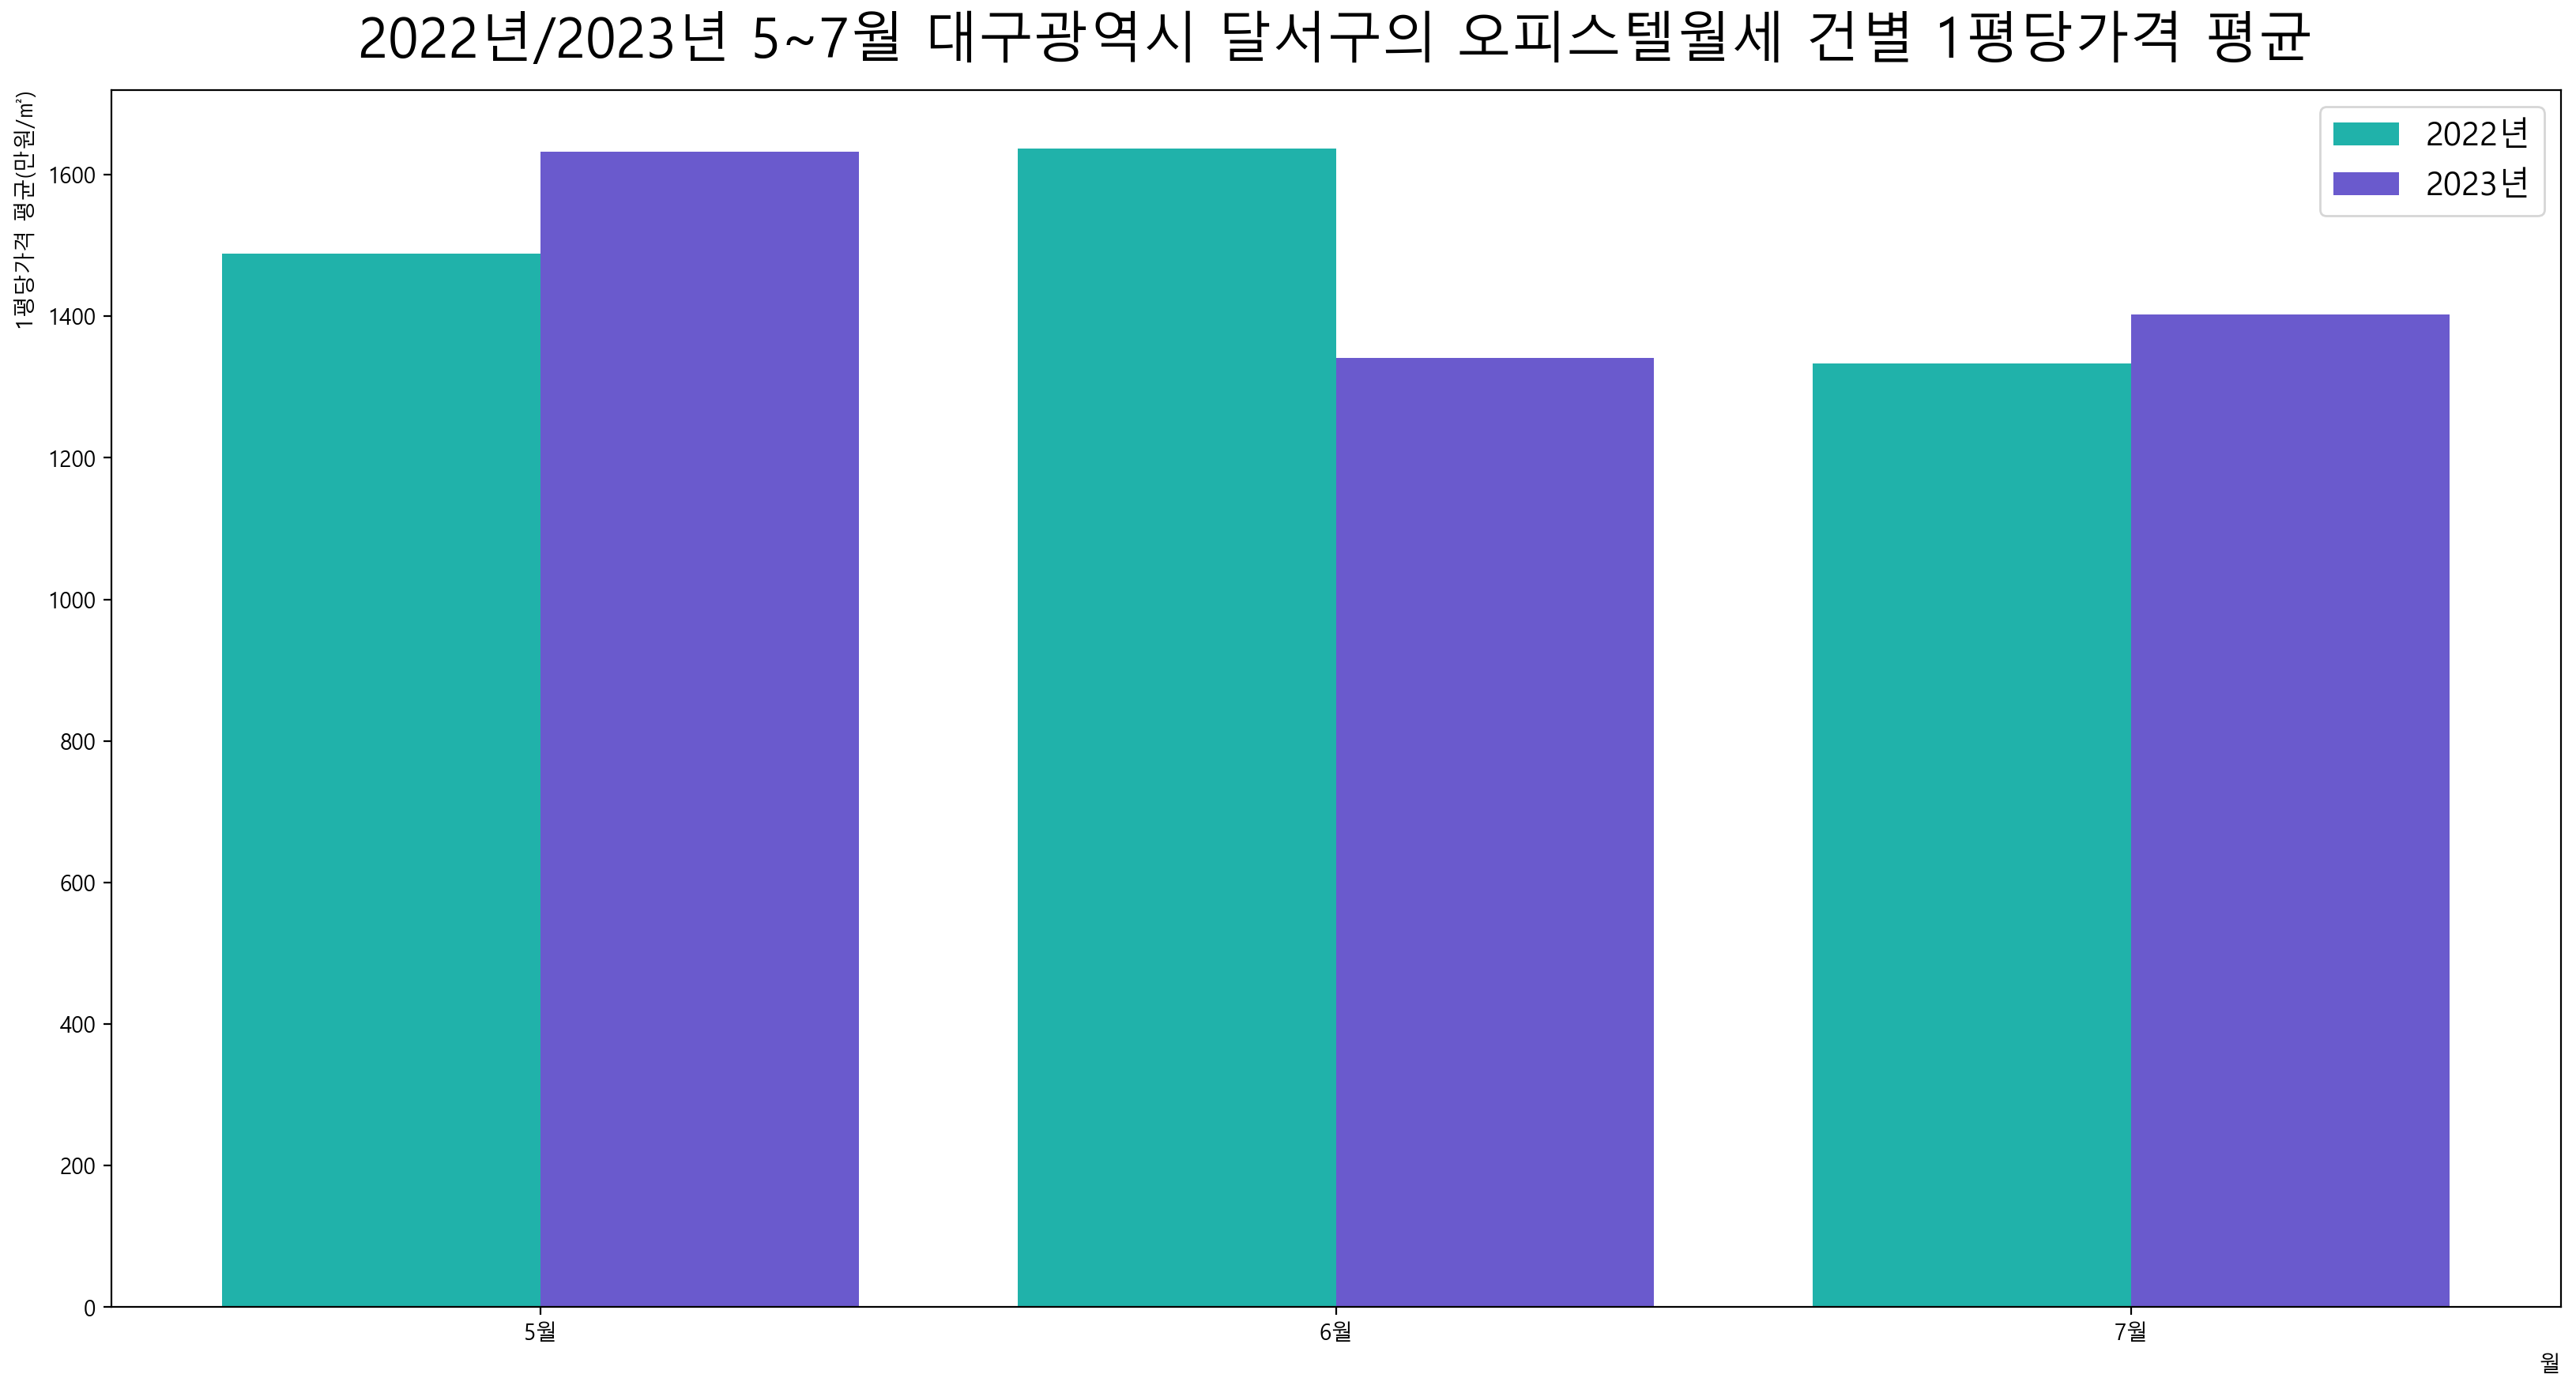

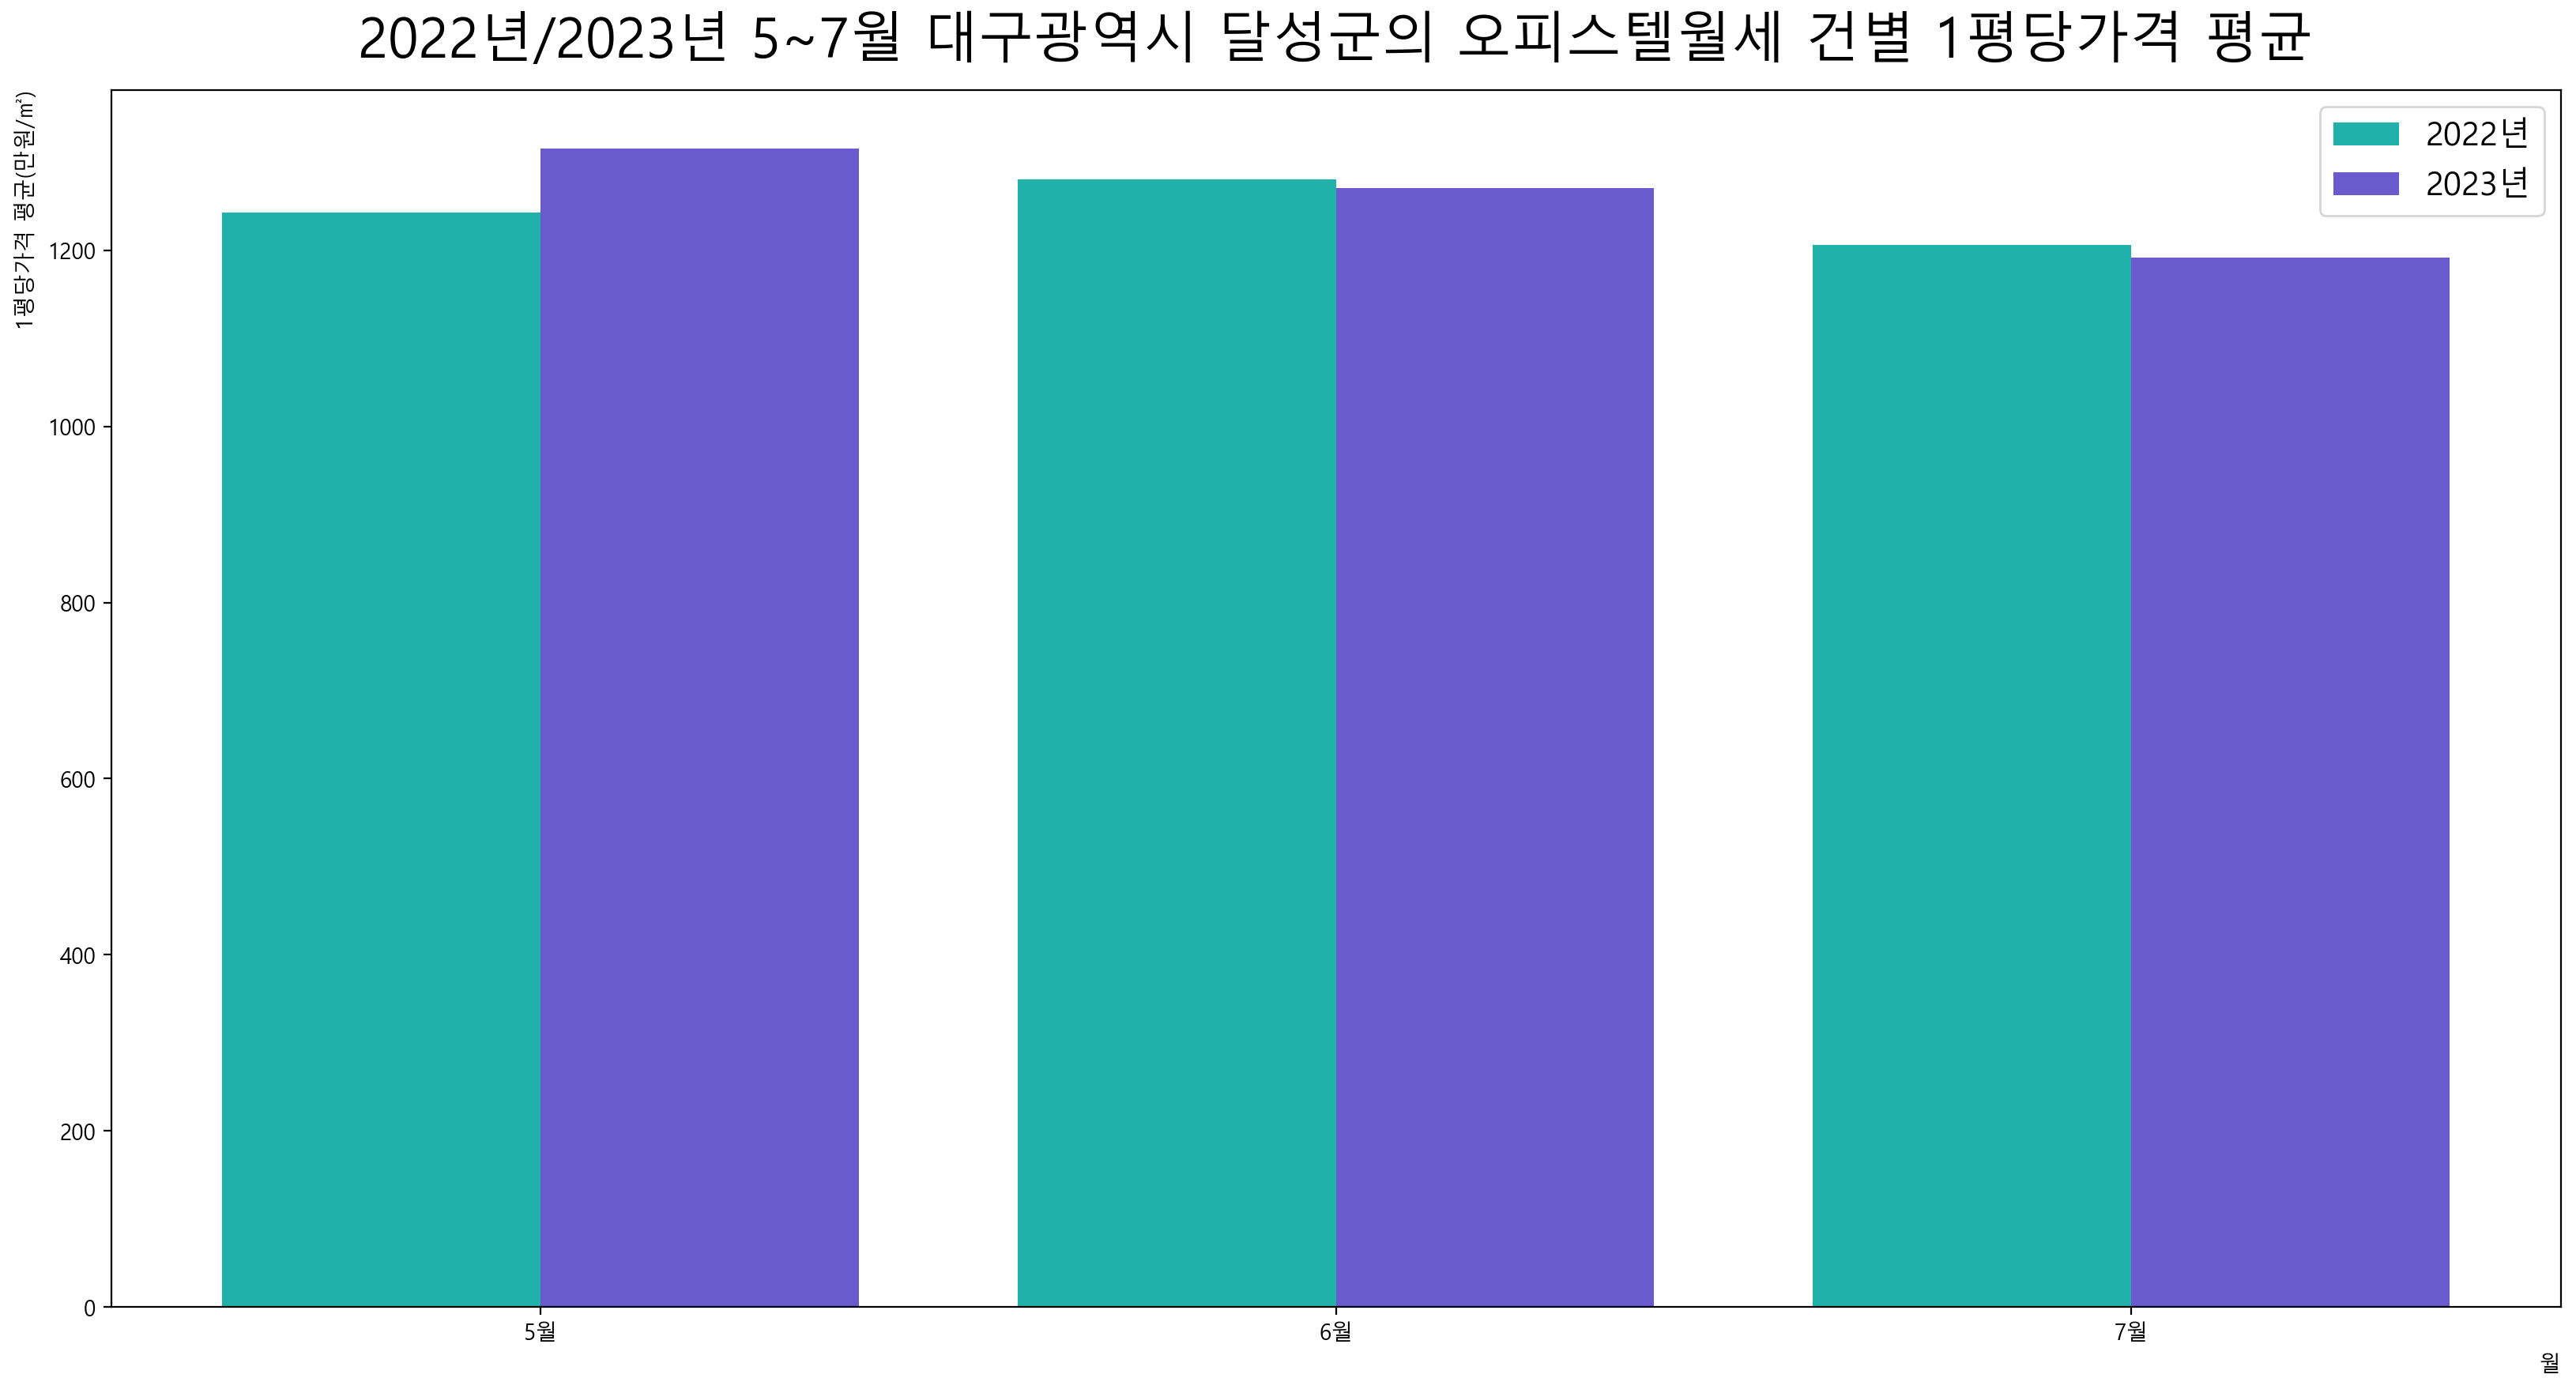

In [21]:
def find_area_month_avg(data, loc,time):
    area=data[data['시군구']==loc]

    if time=='순살':
        area=area[area['건축년도'].isin([2020,2021,2022,2023])]
    elif time!='순살':
        area=area[~area['건축년도'].isin([2020,2021,2022,2023])]
    elif time=='모두':
        area=data

    return area

def quarter_contract_count(area):
    
    month_dict={}

    fst=area[area['계약년월'].dt.month==5]
    month_dict['5월']=sum(fst['1평당가격(만원/㎡)'].values.tolist())/len(fst) if len(fst) != 0 else 0

    fst=area[area['계약년월'].dt.month==6]
    month_dict['6월']=sum(fst['1평당가격(만원/㎡)'].values.tolist())/len(fst) if len(fst) != 0 else 0

    fst=area[area['계약년월'].dt.month==7]
    month_dict['7월']=sum(fst['1평당가격(만원/㎡)'].values.tolist())/len(fst) if len(fst) != 0 else 0
    
    return month_dict


def per_money(area):
    column_name=area.columns.to_list()[3]
    column_area=area.columns.to_list()[1]

    if column_name=='월세(만원)':
        money=area[column_name]/area[column_area]
        area['1평당가격(만원/㎡)']=money*1000

    else:
        money=area[column_name]/area[column_area]
        area['1평당가격(만원/㎡)']=money
        

    return area


def make_two_plot(label, data_dic1, data_dic2):

    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')

    s1 = pd.Series(data_dic1)
    s2 = pd.Series(data_dic2)
    df = pd.DataFrame({'2022년': s1, '2023년': s2})

    category = ['5월','6월','7월']
    fig = plt.figure(figsize=(20,10), dpi=200)
    ax = fig.add_subplot(1,1,1)
    
    bar_width = 0.4
    ax.bar([x - bar_width/2 for x in range(len(category))], df['2022년'], width=bar_width, label='2022년', color='lightseagreen')
    ax.bar([x + bar_width/2 for x in range(len(category))], df['2023년'], width=bar_width, label='2023년', color='slateblue')
    
    ax.set_xticks(range(len(category)))
    ax.set_xticklabels(category)

    plt.title(f'2022년/2023년 5~7월 대구광역시 {label}의 오피스텔월세 건별 1평당가격 평균', fontsize=25, pad=15)
    ax.set_xlabel('월', loc='right')
    ax.set_ylabel('1평당가격 평균(만원/㎡)', loc='top')
    ax.legend(prop={'size': 15})
    
    file_name = f'{label}.png'

    plt.savefig(f'./오피스텔월세/{file_name}')



loc_list = ['중구','동구','서구','남구','북구','수성구','달서구','달성군']
df1 = per_money(rent('오피스텔(전월세)_실거래가_2022.xlsx')[0])
df2 = per_money(rent('오피스텔(전월세)_실거래가_2023.xlsx')[0])

print(df1)

# 그래프 시각화
for i in loc_list:
    data1 = quarter_contract_count(find_area_month_avg(df1, i, '모두'))
    data2= quarter_contract_count(find_area_month_avg(df2, i, '모두'))
    make_two_plot(i, data1, data2)





# 1. 건축년도가 2020~2023이 아닌 아파트 매매의 5,6,7월 1평당가격 평균 / 건축년도가 2020~2023인
# 2. 건축년도가 2020~2023이 아닌 아파트 전/월세의 5,6,7월 1평당가격 평균 / 건축년도가 2020~2023인

# 3. 건축년도가 2020~2023이 아닌 오피스텔 월세의 5,6,7월 1평당가격 평균 / 건축년도가 2020~2023인
# 4. 건축년도가 2020~2023이 아닌 오피스텔 전/월세의 5,6,7월 1평당가격 평균 / 건축년도가 2020~2023인


### 결과분석

2023년 4월 순살아파트 보도 이후 대구광역시 구별 아파트/ 오피스텔 매매/전세/월세 가격

: 아파트 전세가격지수가 2년전에 비해 약 12퍼 떨어진 이유는
=> 금리인상으로 인해 늘어난 전세자금대출 이자비용/ 전세사기,역전세난
=> 대구는...... 미분양 입주물량 과잉으로 수요보다 공급이 많아짐

: 매매가격이 하락할 것이라 예상되는 이유
=> 경기 불안정, 신규 입주물량 증가, 현재 가격 수준이 높다는 인식

: 전세가격이 하락할 것이라 예상되는 이유
=> 전세사기, 임차보증금 반환 리스크, 전세 대출이자 부담

:월세가격 상승할 것이라 예상되는 이유
=> 매매, 전세대출 부담으로 월세 수요 증가


1. 아파트 매매 : 작년에 비해 낮아지거나 높아진 경향은 있지만, 2023년에는 3개월간 비슷한 가격을 유지함 ==> 순살 아파트의 영향보다는 매매가격이 내려간게 더 큰듯 
- 남구 : 2023년이 2022년에 비해 가격이 비슷하거나 낮아짐
- 달서구 : 2023년이 가격이 낮아짐
- 달성군 : 비슷한 수준
- 동구 : 가격이 낮아짐
- 북구 : 전체적으로 높아짐
- 서구 : 전체적으로 낮아짐
- 중구 : 작년과 비슷한 수준

2. 아파트 월세: 2023년 각 구별 비슷한 수준을 유지함 => 영향을 안 받은듯

3. 아파트 전세 => 작년에 비해 전세 가격이 낮아진것이 원인인것으로 보임

4. 오피스텔 매매
5. 오피스텔 전세
6. 오피스텔 월세